# Programs and Output:

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("loan_small.csv")
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,application_type
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,Computer,INDIVIDUAL
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,bike,INDIVIDUAL
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,small_business,real estate business,INDIVIDUAL
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,other,personel,INDIVIDUAL
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,RENT,80000.0,Source Verified,Dec-11,Current,n,other,Personal,INDIVIDUAL


In [7]:
# checking the percentage of missing values in each variable
df.isnull().sum()/len(df)*100

id                     0.0
member_id              0.0
loan_amnt              0.0
funded_amnt            0.0
funded_amnt_inv        0.0
term                   0.0
int_rate               0.0
installment            0.0
grade                  0.0
sub_grade              0.0
home_ownership         0.0
annual_inc             0.0
verification_status    0.0
issue_d                0.0
loan_status            0.0
pymnt_plan             0.0
purpose                0.0
title                  0.0
application_type       0.0
dtype: float64

In [10]:
var = df.var()
var

id                 7.226177e+09
member_id          8.865661e+09
loan_amnt          7.200038e+07
funded_amnt        6.861574e+07
funded_amnt_inv    6.734106e+07
int_rate           1.803794e+01
installment        5.126174e+04
annual_inc         2.385052e+09
dtype: float64

In [15]:
columns = df.columns
column = []
for i in range(len(var)):
    if var[i] >= 10:
        column.append(columns[i])
        
column

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment']

In [16]:
df[column]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment
0,1077501,1296599,5000,5000,4975.00000,36 months,10.65,162.87
1,1077430,1314167,2500,2500,2500.00000,60 months,15.27,59.83
2,1077175,1313524,2400,2400,2400.00000,36 months,15.96,84.33
3,1076863,1277178,10000,10000,10000.00000,36 months,13.49,339.31
4,1075358,1311748,3000,3000,3000.00000,60 months,12.69,67.79
...,...,...,...,...,...,...,...,...
10992,822880,1031392,2000,2000,2000.00000,60 months,11.49,43.98
10993,822087,1030499,35000,35000,30568.20639,60 months,13.49,805.17
10994,822495,1030936,6000,6000,6000.00000,36 months,14.79,207.38
10995,822845,1031350,30000,30000,27212.91432,60 months,19.29,783.02


In [17]:
df1 = df.drop('id', 1)
df1.corr()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc
member_id,1.000000,0.017974,0.022528,0.032001,0.076294,0.043220,-0.056870
loan_amnt,0.017974,1.000000,0.990342,0.985953,0.330114,0.941676,0.369686
funded_amnt,0.022528,0.990342,1.000000,0.995751,0.326499,0.956816,0.368660
funded_amnt_inv,0.032001,0.985953,0.995751,1.000000,0.324145,0.954776,0.366954
int_rate,0.076294,0.330114,0.326499,0.324145,1.000000,0.289154,0.092934
installment,0.043220,0.941676,0.956816,0.954776,0.289154,1.000000,0.381331
annual_inc,-0.056870,0.369686,0.368660,0.366954,0.092934,0.381331,1.000000


In [20]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=1, max_depth=10)
df1=pd.get_dummies(df1)
model.fit(df1,df.id)

RandomForestRegressor(max_depth=10, random_state=1)

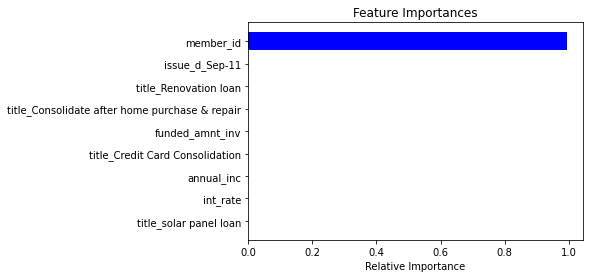

In [21]:
features = df1.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-9:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn import datasets
lreg = LinearRegression()
rfe = RFE(lreg, 10)
rfe = rfe.fit_transform(df1, df.id)

In [27]:
from sklearn.feature_selection import f_regression
ffs = f_regression(df1,df.id )

C:\Users\siles\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:301: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
C:\Users\siles\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:306: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom


In [28]:
variable = [ ]
for i in range(0,len(df1.columns)-1):
    if ffs[0][i] >=10:
       variable.append(df1.columns[i])

In [29]:
variable

['member_id',
 'funded_amnt_inv',
 'int_rate',
 'installment',
 'annual_inc',
 'grade_A',
 'grade_C',
 'home_ownership_MORTGAGE',
 'home_ownership_RENT',
 'issue_d_Aug-11',
 'issue_d_Dec-11',
 'issue_d_Jul-11',
 'issue_d_Nov-11',
 'issue_d_Oct-11',
 'issue_d_Sep-11',
 'loan_status_Charged Off',
 'loan_status_Fully Paid',
 'purpose_credit_card',
 'purpose_debt_consolidation',
 'purpose_home_improvement',
 'purpose_major_purchase',
 'purpose_moving',
 'title_Credit Card Loan',
 'title_Debt',
 'title_Debt Consolidation Loan',
 'title_Get Rid of Timeshare',
 'title_Lower interest rate loan',
 'title_Refinance high interest credit card',
 'title_Small_Business Loan',
 'title_debt_consolidation']